# FITSNAP FAVICON

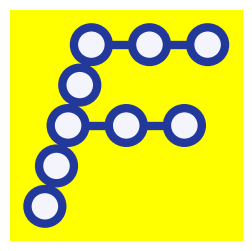

In [140]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.patches as patches
import numpy as np
import itertools

fig, ax = plt.subplots(figsize=(3,3))
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
fs_light_blue = '#F3F4FC'
fs_yellow = 'yellow'
fs_blue = '#22389A'
fs_radius = .75
fs_lw = 6
ax.add_patch(patches.Rectangle((0,0), 10, 10,fc=fs_yellow))
ax.axis("off")
ax.add_line(lines.Line2D([1.5,3.5],[1.5,8.5],lw=fs_lw, color=fs_blue, axes=ax,zorder=1))
ax.add_line(lines.Line2D([2.5,7.5],[5,5],lw=fs_lw, color=fs_blue, axes=ax,zorder=1))
ax.add_line(lines.Line2D([3.5,8.5],[8.5,8.5],lw=fs_lw, color=fs_blue, axes=ax,zorder=1))

circles = zip(np.arange(1.5,3.51,.5), np.arange(1.5,8.51,(8.5-1.5)/4))
circles = itertools.chain(circles,[(5,5),(7.5,5),(6,8.5),(8.5,8.5)])

for x, y in circles:
    ax.add_patch( patches.Circle((x,y),radius=fs_radius,linewidth=fs_lw,ec=fs_blue,fc=fs_light_blue))

plt.savefig('fs_favicon.png', bbox_inches='tight',pad_inches=0)
from PIL import Image
Image.open('fs_favicon.png').save('fs_favicon.ico')

# GENERATE EXAMPLES.RST

In [14]:
%%writefile examples_rst.py

import os, re
from itertools import islice

with open('../src/examples.rst', 'w') as rst:

    print( '\nExamples\n=========\n\n', file=rst )
    
    with os.scandir('../../examples') as examples:

        sorted_examples = sorted([e for e in examples if e.is_dir()], key=lambda e: e.name)
        
        for i, e in enumerate(sorted_examples):
            #print(e)

            if i>0: print("--------\n", file=rst )
            print(f"{e.name}\n{''.join(['-']*len(e.name))}\n", file=rst )

            if os.path.isfile(readme_path := f"../../examples/{e.name}/README.md"):
                print(f".. include:: {readme_path}\n", file=rst )
                #print(f"  :parser: myst_parser.sphinx_\n", file=rst )
            else:
                print(f"See ``examples/{e.name}/`` for details.\n\n", file=rst )
            

Overwriting examples_rst.py
